Columnas en alumnos: ['_id', 'nombre_alumno', 'app', 'apm', 'id_carrera', 'id_grupo', 'id_alumno', 'curp', 'rfc', 'sexo', 'genero', 'estado_civil', 'updated_at', 'created_at']
Columnas en carreras: ['_id', 'nombre_carrera', 'updated_at', 'created_at']
Columnas después del merge: ['_id_x', 'nombre_alumno', 'app', 'apm', 'id_carrera', 'id_grupo', 'id_alumno', 'curp', 'rfc', 'sexo', 'genero', 'estado_civil', 'updated_at_x', 'created_at_x', '_id_y', 'nombre_carrera', 'updated_at_y', 'created_at_y']


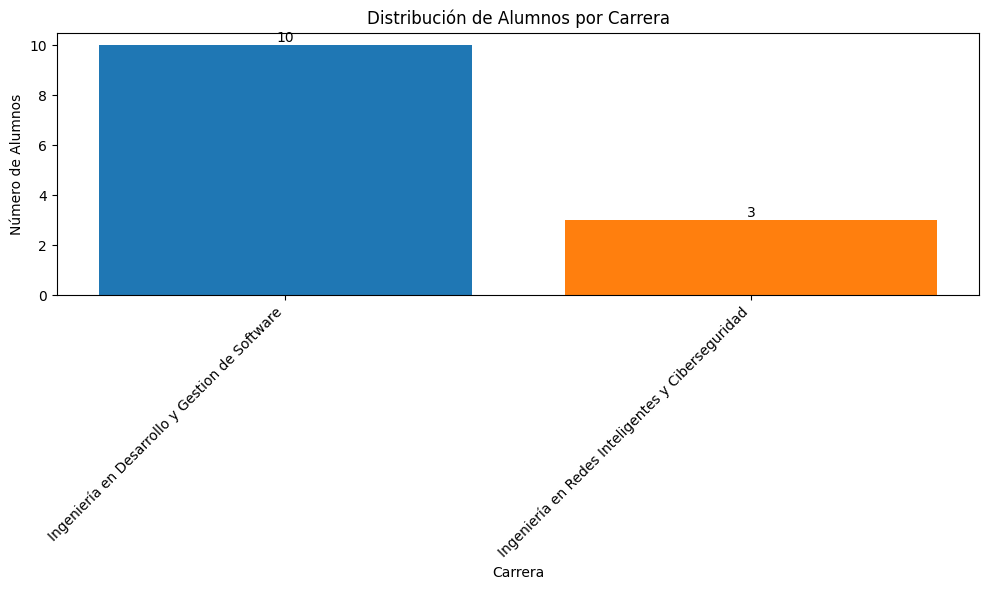

Resultado Final:
                                          Carrera  Número de Alumnos
   Ingeniería en Desarrollo y Gestion de Software                 10
Ingeniería en Redes Inteligentes y Ciberseguridad                  3


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar los archivos CSV
alumnos = pd.read_csv('csv/alumnos.csv')
carreras = pd.read_csv('csv/carreras.csv')

# 2. Verificar las columnas disponibles (para depuración)
print("Columnas en alumnos:", alumnos.columns.tolist())
print("Columnas en carreras:", carreras.columns.tolist())

# 3. Unir los DataFrames usando 'id_carrera' y '_id'
# Nota: Asegúrate de que los nombres de columnas coincidan exactamente
datos_completos = alumnos.merge(
    carreras,
    left_on='id_carrera',  # Columna en alumnos.csv
    right_on='_id',        # Columna en carreras.csv
    how='left'
)

# 4. Verificar las columnas después del merge (para depuración)
print("Columnas después del merge:", datos_completos.columns.tolist())

# 5. Contar alumnos por carrera
# Usamos el nombre de la columna correcta (puede ser 'nombre_y' o similar)
conteo = datos_completos['nombre_carrera'].value_counts().reset_index()  # Ajusta 'nombre_y' según lo que muestre el print anterior
conteo.columns = ['Carrera', 'Número de Alumnos']

# 6. Crear el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(conteo['Carrera'], conteo['Número de Alumnos'], color=['#1f77b4', '#ff7f0e'])
plt.title('Distribución de Alumnos por Carrera')
plt.xlabel('Carrera')
plt.ylabel('Número de Alumnos')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 7. Mostrar la tabla
print("Resultado Final:")
print(conteo.to_string(index=False))